<a href="https://colab.research.google.com/github/gigovam/ITDS/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
# Install chromium, its driver, and selenium.
!apt update
!apt install chromium-chromedriver
!pip install selenium

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,012 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,185 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,389 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [589 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelea

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [ ]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-MK" lang="en-MK" prefix="og: http://ogp.me/ns#" class="js no-touch progressive-image no-reduced-motion no-edge no-ie css-mask inline-video desktop no-tablet no-windows no-android no-retina no-safari no-old-safari chrome no-firefox no-iphone no-ipad ac-ls-visible ac-ls-fixed" data-layout-name="evergreen"><head>
	
































<meta charset="utf-8">
<link rel="canonical" href="https://www.apple.com/mk/">


	
	<link rel="alternate" href="https://www.apple.com/" hreflang="en-US"><link rel="alternate" href="https://www.apple.com/ae-ar/" hreflang="ar-AE"><link rel="alternate" href="https://www.apple.com/ae/" hreflang="en-AE"><link rel="alternate" href="https://www.apple.com/am/" hreflang="en-AM"><link rel="alternate" href="https://www.apple.com/at/" hreflang="de-AT"><link rel="alternate" href="https://www.apple.com/au/" hreflang="en-AU"><link rel="alternate" href="https://www.apple.com/az/" hreflang="en-AZ"><link rel=

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

iPhone 15 Pro


# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [ ]:
url = 'https://www.scrapethissite.com/pages/forms/'
browser.get(url)

In [ ]:
print(browser.page_source)

<html lang="en"><head>
    <meta charset="utf-8">
    <title>Hockey Teams: Forms, Searching and Pagination | Scrape This Site | A public sandbox for learning web scraping</title>
    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="description" content="Browse through a database of NHL team stats since 1990. Practice building a scraper that handles common website interface components.">

    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">
    <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css">
    <link rel="stylesheet" type="text/css" href="/static/css/styles.css">

    
<meta name="robots"

In [ ]:
elements = browser.find_elements(By.CLASS_NAME, 'team')

In [ ]:
len(elements)

25

In [ ]:
team_names = []
years = []
wins = []
losses = []

for i in range(0, len(elements)):
  team_names.append(elements[i].find_element(By.CLASS_NAME, 'name').text)
  years.append(int(elements[i].find_element(By.CLASS_NAME, 'year').text))
  wins.append(int(elements[i].find_element(By.CLASS_NAME, 'wins').text))
  losses.append(int(elements[i].find_element(By.CLASS_NAME, 'losses').text))

In [ ]:
(len(team_names) == len(years) == len(wins) == len(losses))

True

In [ ]:
matrix = []

for i in range(0, len(elements)):
  matrix.append([team_names[i], years[i], wins[i], losses[i]])
matrix

[['Boston Bruins', 1990, 44, 24],
 ['Buffalo Sabres', 1990, 31, 30],
 ['Calgary Flames', 1990, 46, 26],
 ['Chicago Blackhawks', 1990, 49, 23],
 ['Detroit Red Wings', 1990, 34, 38],
 ['Edmonton Oilers', 1990, 37, 37],
 ['Hartford Whalers', 1990, 31, 38],
 ['Los Angeles Kings', 1990, 46, 24],
 ['Minnesota North Stars', 1990, 27, 39],
 ['Montreal Canadiens', 1990, 39, 30],
 ['New Jersey Devils', 1990, 32, 33],
 ['New York Islanders', 1990, 25, 45],
 ['New York Rangers', 1990, 36, 31],
 ['Philadelphia Flyers', 1990, 33, 37],
 ['Pittsburgh Penguins', 1990, 41, 33],
 ['Quebec Nordiques', 1990, 16, 50],
 ['St. Louis Blues', 1990, 47, 22],
 ['Toronto Maple Leafs', 1990, 23, 46],
 ['Vancouver Canucks', 1990, 28, 43],
 ['Washington Capitals', 1990, 37, 36],
 ['Winnipeg Jets', 1990, 26, 43],
 ['Boston Bruins', 1991, 36, 32],
 ['Buffalo Sabres', 1991, 31, 37],
 ['Calgary Flames', 1991, 31, 37],
 ['Chicago Blackhawks', 1991, 36, 29]]

In [ ]:
import numpy as np

In [ ]:
df = pd.DataFrame(np.array(matrix), columns = ['TeamName', 'Year', 'Wins', 'Losses'])
df

,TeamName,Year,Wins,Losses
0,Boston Bruins,1990,44,24
1,Buffalo Sabres,1990,31,30
2,Calgary Flames,1990,46,26
3,Chicago Blackhawks,1990,49,23
4,Detroit Red Wings,1990,34,38
5,Edmonton Oilers,1990,37,37
6,Hartford Whalers,1990,31,38
7,Los Angeles Kings,1990,46,24
8,Minnesota North Stars,1990,27,39
9,Montreal Canadiens,1990,39,30


In [ ]:
import matplotlib.pyplot as plt

(array([1., 0., 2., 3., 5., 2., 6., 1., 1., 4.]),
 array([16. , 19.3, 22.6, 25.9, 29.2, 32.5, 35.8, 39.1, 42.4, 45.7, 49. ]),
 <BarContainer object of 10 artists>)

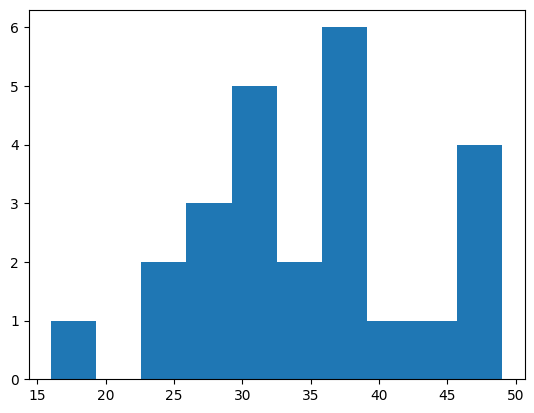

In [ ]:
plt.hist(wins)

(array([4., 1., 3., 4., 0., 7., 1., 2., 2., 1.]),
 array([22. , 24.8, 27.6, 30.4, 33.2, 36. , 38.8, 41.6, 44.4, 47.2, 50. ]),
 <BarContainer object of 10 artists>)

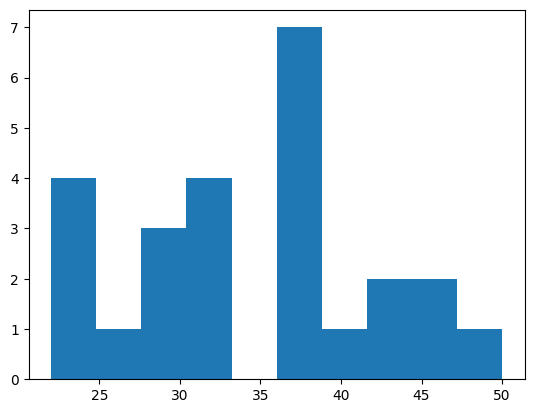

In [ ]:
plt.hist(losses)